## Latar Belakang

Thailand menempati daftar destinasi internasional yang menawarkan pengalaman lengkap mulai dari budaya, alam dan suasananya. Oleh karena itu, Airbnb memiliki peran penting untuk mendukung pelayanan akomodasi yang nyaman dan terjangkau. Bagaimanapun, seiring bertumbuhnya listings di Bangkok, perlu adanya analisis agar listings dapat mengoptimalisasi dalam meningkatkan occupancy rate dan pendapatan. Analisis ini akan meliputi beberapa faktor seperti area listings (neighbourhood), tipe kamar, keyword fasilitas serta transportasi, seasonal trend, persyaratan minimum dalam menginap, dan bahasa yang ditampilkan pada listings.

## Masalah yang akan dianalisis

1. Area Listings : Bagaimana cara agar harga listings dapat bersaing dan wajar dengan listing lainnya?

2. Tipe Kamar : Apa tipe kamar yang diminati oleh wisatawan? 

3. Keyword Fasilitas dan Transportasi : Jenis fasilitas dan transportasi apa yang meninggalkan kesan bagi wisatawan dan bagaimana dampaknya terhadap occupancy rate?

4. Seasonal Trend : Kapan banyaknya wisatawan berkunjung ke Bangkok (high season dan low season)?

5. Minimum Nights Required :  Bagaimana preferensi wisatawan Bangkok (short-term stay atau long-term stay)?

6. Bahasa yang ditampilkan : Bagaimana dampak bahasa yang ditampilkan di listings terhadap occupancy rate dan kesan wisatawan?

## Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

Dataset ini berisi informasi terkait Airbnb Listings di Bangkok. Ada 17 kolom dalam dataset Airbnb Listings Bangkok, yaitu:

- id : kode unik listing Airbnb
- name : nama listing
- host_id : kode unik untuk host Airbnb
- host_name : nama host. biasa hanya ditulis nama depan
- neighbourhood : nama daerah di Bangkok
- latitude : garis lintang yang diukur menggunakan proyeksi sistem geodetic dunia (WGS84)
- longitude: garis bujur yang diukur menggunakan proyeksi sistem geodetic dunia (WGS84)
- room_type : tipe kamar yang ada pada listing Bangkok
- price : harga listing Airbnb perhari (Thai bhat)
- minimum_nights : jumlah minimum malam untuk menginap di listing tersebut
- number_of_reviews : banyaknya review yang dimiliki oleh listing
- last_review : tanggal review terbaru
- reviews_per_month : review per bulan
- calculated_host_listings_count : Jumlah listing yang dimiliki host dalam geografi kota/wilayah
- availability_365 : Jumlah hari daftar tersedia dalam 365 hari ke depan
- number_of_reviews_ltm : banyaknya review yang dimiliki oleh listing (12 bulan terakhir)
- occupancy_rate : tingkat occupancy rate listing dalam persen

In [4]:
df = pd.read_csv("Airbnb Listings Bangkok.csv")
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


## Data Understanding and Cleaning

Proses awal yang akan dilakukan adalah data understanding sehingga kita dapat mengenal dataset yang digunakan. Dalam proses ini, akan diketahui anomali pada data seperti missing values, data formatting, dan duplikat pada data sehingga nantinya anomali tersebut dapat ditangani pada proses data cleaning. 

In [5]:
df1 = df.copy()
df1.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [6]:
df1.drop(['Unnamed: 0'], inplace=True, axis=1)
df1.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


pada tahap ini dilakukan penghapusan kolom 'Unnamed: 0' karena tidak dibutuhkan pada penelitian

#### Format Data

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

In [8]:
df1['last_review'] = pd.to_datetime(df1['last_review'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

last_review diubah format datanya menjadi datetime untuk memudahkan dalam menganalisis data nantinya

#### Duplicated Data

In [9]:
df1.duplicated().sum().sum()

np.int64(0)

tidak ada data data duplikasi

#### Missing Value

In [10]:
print(f'Jumlah baris dan kolom dataset adalah {df1.shape}')
df1.info()

Jumlah baris dan kolom dataset adalah (15854, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews   

In [11]:
#persentase missing value di tiap kolom
df1.isna().sum()/df1.shape[0]*100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

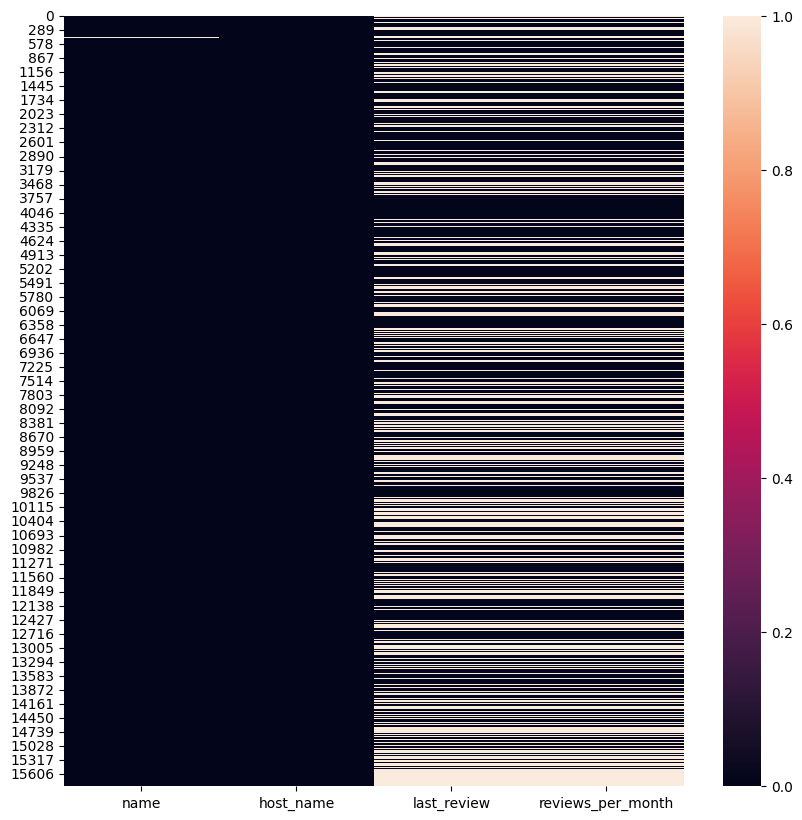

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna())

Terdapat 15.854 baris pada data. Kolom yang memiliki missing value adalah 'name' dan 'host_name' dengan persentase yang kecil (<10%), sedangkan pada kolom last_review dan reviews_per_month memiliki persentase yang cukup tinggi (>10%)

In [13]:
df1[['name','host_name']].isna().sum()

name         8
host_name    1
dtype: int64

In [14]:
df1[df1['name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [15]:
df1[df1['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [16]:
df1[df1['host_id']=='137488762']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


Missing value pada kolom name yang merupakan nama listings masih memiliki beberapa informasi yang berguna untuk proses analisis data kedepannya, sehingga daripada menghapusnya, pada proses kali ini kolom name akan diimputasi dengan suatu nilai. 

Lalu pada host_name, karena tidak ditemukan melalui kolom host_id tetapi masih memiliki informasi yang berguna, maka juga akan diimputasi oleh suatu nilai

In [17]:
df1['name'].fillna("unknown",inplace=True)
df1[df1['host_name'].isnull()]
df1['host_name'].fillna("unknown",inplace=True)

/var/folders/vw/gbfvhr_d00b3ltzk70h586xh0000gn/T/ipykernel_91911/4015303255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['name'].fillna("unknown",inplace=True)
/var/folders/vw/gbfvhr_d00b3ltzk70h586xh0000gn/T/ipykernel_91911/4015303255.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [18]:
df1[['name','host_name']].isna().sum()

name         0
host_name    0
dtype: int64

In [19]:
df1[['last_review', 'reviews_per_month']].isna().sum()

last_review          5790
reviews_per_month    5790
dtype: int64

In [20]:
df1[df1['reviews_per_month'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaT,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaT,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


Dilihat pada tabel diatas, missing values pada kolom last_review dan reviews_per_month memiliki jumlah yang sama dan terjadi pada baris yang sama. kolom ini terlihat sebagai missing value karena kolom number_of_reviews = 0, sehingga secara logika tidak akan ada review yang terhitung. Oleh karena itu, missing value pada 2 kolom tersebut akan ditangani dengan imputasi nilai

In [21]:
df1['last_review'].fillna(0,inplace=True)
df1['reviews_per_month'].fillna("0000-00-00",inplace=True)
df1[['last_review', 'reviews_per_month']].isna().sum()

/var/folders/vw/gbfvhr_d00b3ltzk70h586xh0000gn/T/ipykernel_91911/2989717774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['last_review'].fillna(0,inplace=True)
/var/folders/vw/gbfvhr_d00b3ltzk70h586xh0000gn/T/ipykernel_91911/2989717774.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df1['last_review'].fillna(0,inplace=True)
/var/fol

last_review          0
reviews_per_month    0
dtype: int64

In [22]:
#persentase missing value di tiap kolom
df1.isna().sum()/df1.shape[0]*100

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64

Missing values sudah teratasi di semua kolom

In [23]:
df1.drop(['host_id'], inplace=True, axis=1)
df1.drop(['id'], inplace=True, axis=1)
df1.head()

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.5,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0,0000-00-00,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0,0000-00-00,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0,0000-00-00,3,365,0


Penghapusan kolom host_id dilakukan karena mewakili host, yang mana sudah diketahui pada kolom 'host_name'. Agar lebih mudah dalam pemahaman saat analisis data berlangsung, maka host_name dipilih untuk dipertahankan dibandingkan host_id. Sama dengan host_id, kolom id dihapus karena sudah diwakilkan oleh nama tiap listings dan tidak diperlukan dalam analisis

#### Statistika Deskriptif dari data

In [24]:
df1.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
mean,13.745144,100.559903,3.217704e+03,15.292355,16.654157,13.889618,244.378643,3.481519
std,0.043040,0.050911,2.497212e+04,50.815020,40.613331,30.269848,125.843224,8.916937
min,13.527300,100.329550,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000
25%,13.720090,100.529690,9.000000e+02,1.000000,0.000000,1.000000,138.000000,0.000000
50%,13.738490,100.561415,1.429000e+03,1.000000,2.000000,4.000000,309.000000,0.000000
75%,13.759497,100.585150,2.429000e+03,7.000000,13.000000,13.000000,360.000000,3.000000
max,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,228.000000,365.000000,325.000000


In [25]:
df1.describe(include=object)

,name,host_name,neighbourhood,room_type,last_review,reviews_per_month
count,15854,15854,15854,15854,15854,15854
unique,14795,5313,50,4,1670,514
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,0,0000-00-00
freq,45,228,2153,8912,5790,5790


Pada kolom price, ada data nilai terkecil yaitu 0 yang biasanya tidak terjadi. Sehingga, perlu pemeriksaan lebih lanjut 

In [26]:
df1[df1['price']==0]

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,Somerset Maison Asoke Bangkok,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,0,0000-00-00,1,0,0


kemungkinan data ini disebabkan oleh kesalahan imputasi informasi dari host. Oleh karena itu, untuk menghindari kesalahan pada analisis, data ini akan dihapus.

In [27]:
df1.drop(index=11103,inplace=True)
df1[df1['price']==0]

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


## Cleaned Data

In [28]:
#melihat data
listItem = []
for col in df1.columns :
    listItem.append([col, df1[col].dtype, df1[col].isna().sum(),
                    df1[col].nunique(), list(df1[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df1.shape)
dfDesc

(15853, 14)


,dataFeatures,dataType,null,unique,uniqueSample
0,name,object,0,14794,"[SR01：曼谷拉瑪九/品牌酒店式公寓/一房一廳/免費泳池＆健身房, Comfortable..."
1,host_name,object,0,5312,"[Katesirin, Baan Dinso Original House]"
2,neighbourhood,object,0,50,"[Pom Prap Sattru Phai, Bang Khun thain]"
3,latitude,float64,0,9606,"[13.83817, 13.7159]"
4,longitude,float64,0,10224,"[100.50849, 100.49524]"
5,room_type,object,0,4,"[Shared room, Hotel room]"
6,price,int64,0,3039,"[854, 1205]"
7,minimum_nights,int64,0,86,"[17, 5]"
8,number_of_reviews,int64,0,298,"[331, 110]"
9,last_review,object,0,1670,"[2022-12-16 00:00:00, 2019-02-17 00:00:00]"


Sebelum dilakukan proses cleaning data, data berjumlah 15.854 baris. Setelah cleaning data, data berjumlah 15.853 baris. Hanya 1 baris data anomali yang dihapus, sisanya ditangani dengan imputasi nilai yang dirasa relevan. Jumlah data setelah cleaning data masih dianggap baik karena tidak banyak informasi yang dihapus.

## Data Analysis

Setelah melewati proses data cleaning. Proses selanjutnya adalah analisis data bagaimana mengoptimalisasi komponen airbnb untuk meningkatkan occupancy rate dan pendapatan host

In [29]:
df1['occupancy_rate'] = ((365 - df1['availability_365'])/365) * 100
df1.head()

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,occupancy_rate
0,Nice room with superb city view,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.5,2,353,0,3.287671
1,"Easy going landlord,easy place",Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0,0000-00-00,2,358,0,1.917808
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0,0000-00-00,1,365,0,0.000000
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1,11.506849
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0,0000-00-00,3,365,0,0.000000


#### Berdasarkan Area

In [30]:
df_area_price = df1.groupby('neighbourhood', as_index=False)['price'].mean().sort_values("price", ascending=False)
df_area_price.head()

,neighbourhood,price
7,Bang Phlat,6257.488479
18,Huai Khwang,5036.084444
21,Khlong San,4772.330532
47,Vadhana,4454.200279
29,Parthum Wan,4355.628571


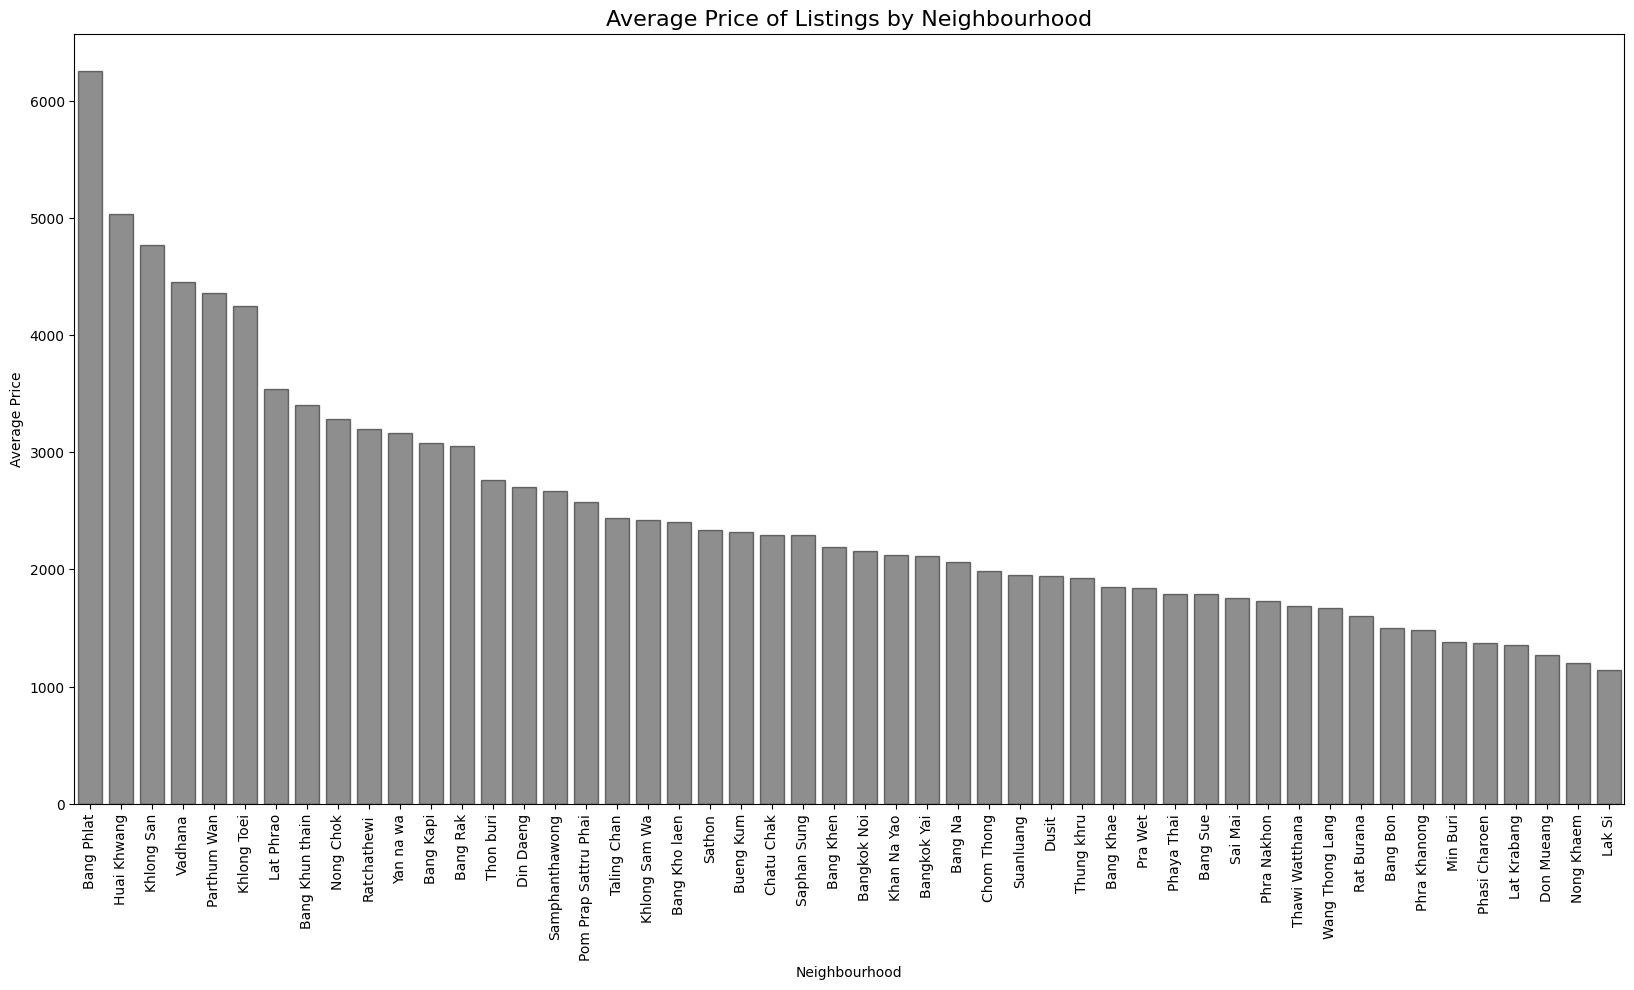

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_area_price, x='neighbourhood', y='price', alpha=0.5, edgecolor='black', color='#211F1F')
plt.title("Average Price of Listings by Neighbourhood", fontsize=16)
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

Grafik ini menampilkan variasi harga di area (neighbourhood) yang berbeda. Mengetahui rata - rata harga tiap area dapat membantu host dalam mengatur strategi agar tetap kompetitif.

In [32]:
df_area_occupancy = df1.groupby('neighbourhood', as_index=False)['occupancy_rate'].mean().sort_values("occupancy_rate", ascending=False)
df_area_occupancy.head()

,neighbourhood,occupancy_rate
18,Huai Khwang,45.077626
39,Samphanthawong,37.719298
47,Vadhana,37.715410
48,Wang Thong Lang,36.786301
45,Thon buri,36.710823


In [33]:
df_area_price['price_rank'] = df_area_price['price'].rank(method='dense', ascending=False).astype(int)

In [34]:
df_area_occupancy['occupancy_rank'] = df_area_occupancy['occupancy_rate'].rank(method='dense', ascending=False).astype(int)

In [35]:
df_area_ranked = (
    df_area_price
    .merge(df_area_occupancy, on='neighbourhood', how='left')
)

df_area_ranked.head()


,neighbourhood,price,price_rank,occupancy_rate,occupancy_rank
0,Bang Phlat,6257.488479,1,35.332365,8
1,Huai Khwang,5036.084444,2,45.077626,1
2,Khlong San,4772.330532,3,31.610452,20
3,Vadhana,4454.200279,4,37.715410,3
4,Parthum Wan,4355.628571,5,32.329971,14


In [36]:
df_area_ranked.tail()

,neighbourhood,price,price_rank,occupancy_rate,occupancy_rank
45,Phasi Charoen,1370.219355,46,28.952718,26
46,Lat Krabang,1358.523490,47,25.648616,40
47,Don Mueang,1273.910180,48,26.832910,35
48,Nong Khaem,1205.222222,49,25.327245,42
49,Lak Si,1143.833333,50,25.633833,41


Tabel diatas menampikan urutan rata - rata harga dan rata - rata occupancy rate masing - masing area. Informasi ini dapat digunakan oleh para host untuk mengevaluasi harga berdasarkan harga area lain agar tidak overprice ataupun underprice. 

In [37]:
q1 = df_area_ranked['price'].quantile(0.25)
q3 = df_area_ranked['price'].quantile(0.75)
iqr = q3 - q1

In [38]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
    
outliers = df_area_ranked[(df_area_ranked['price'] < lower_bound) | (df_area_ranked['price'] > upper_bound)]
outliers

,neighbourhood,price,price_rank,occupancy_rate,occupancy_rank
0,Bang Phlat,6257.488479,1,35.332365,8
1,Huai Khwang,5036.084444,2,45.077626,1


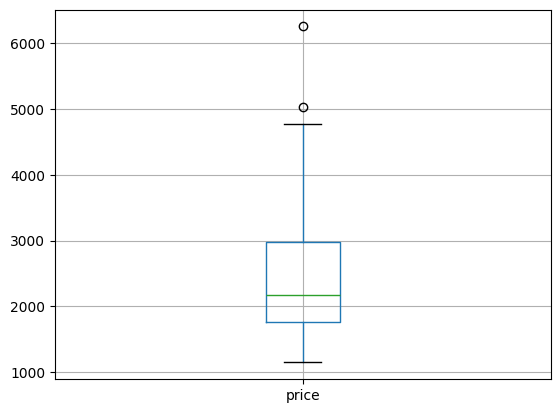

In [39]:
df_area_ranked.boxplot(column='price')
plt.show()

Boxplot diatas menunjukkan beberapa area yang memiliki harga lebih tinggi dibandingkan area lainnya. Hal ini dapat disebabkan dari berbagai faktor seperti kepadatan wisatawan atau area premium. 

Berdasarkan grafik diatas, kita dapat menjawab pertanyaan:

- Bagaimana cara agar harga listings dapat bersaing dan wajar dengan listing lainnya?

Harga tiap area dapat menyesuaikan di harga rata - rata agar dapat memberikan harga yang wajar dan mengevaluasi harga melalui perbandingan daerah lain agar lebih bersaing dalam peningkatan occupancy rate

#### Berdasarkan Tipe Kamar

In [40]:
df_room_price = df1.groupby(['room_type'], as_index=False)['price'].mean().sort_values("price", ascending=False)
df_room_price

,room_type,price
0,Entire home/apt,3465.474529
2,Private room,3064.603640
1,Hotel room,3032.983025
3,Shared room,919.757170


In [41]:
df_room_reviews = df1.groupby(['room_type'], as_index=False)['number_of_reviews'].sum().sort_values("number_of_reviews", ascending=False)
df_room_reviews

,room_type,number_of_reviews
0,Entire home/apt,197943
2,Private room,50710
1,Hotel room,12700
3,Shared room,2682


In [42]:
df_room_occ = df1.groupby(['room_type'], as_index=False)['occupancy_rate'].mean().sort_values("occupancy_rate", ascending=False)
df_room_occ

,room_type,occupancy_rate
0,Entire home/apt,38.279033
1,Hotel room,27.793844
2,Private room,26.184041
3,Shared room,25.987061


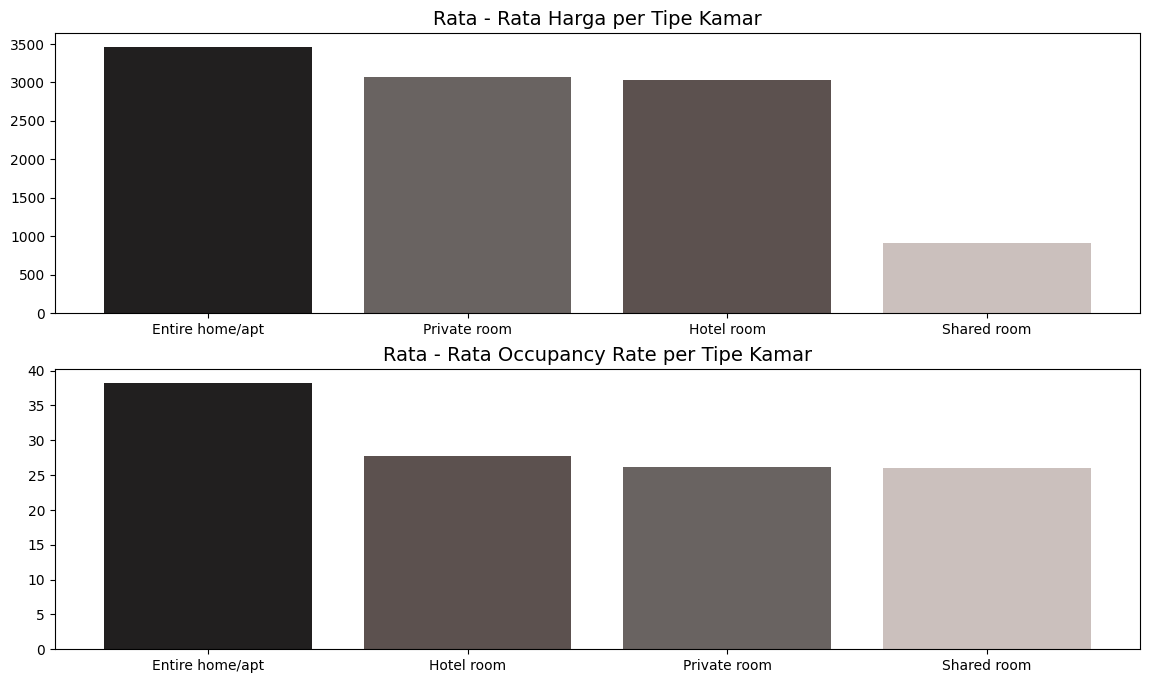

In [80]:
room_colors = {
    "Entire home/apt": "#211F1F",   
    "Private room":    "#696361",   
    "Hotel room":      "#5C514F",   
    "Shared room":     "#CBC0BD"    
}

fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(2, 1)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])

# plot 1: price
ax1.bar(df_room_price['room_type'], df_room_price['price'], color=[room_colors[r] for r in df_room_price['room_type']])
ax1.set_title("Rata - Rata Harga per Tipe Kamar", fontsize=14)

# plot 2: occupancy
ax2.bar(df_room_occ['room_type'], df_room_occ['occupancy_rate'], color=[room_colors[r] for r in df_room_occ['room_type']])
ax2.set_title("Rata - Rata Occupancy Rate per Tipe Kamar", fontsize=14)

plt.show()


Grafik ini menunjukkan harga rata - rata tiap tipe kamar dan tipe kamar yang diminati oleh wisatawan.

/var/folders/vw/gbfvhr_d00b3ltzk70h586xh0000gn/T/ipykernel_91911/3902245442.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  night_room_type = df1.groupby(["room_type","min_nights_group"]).size().unstack(fill_value=0)


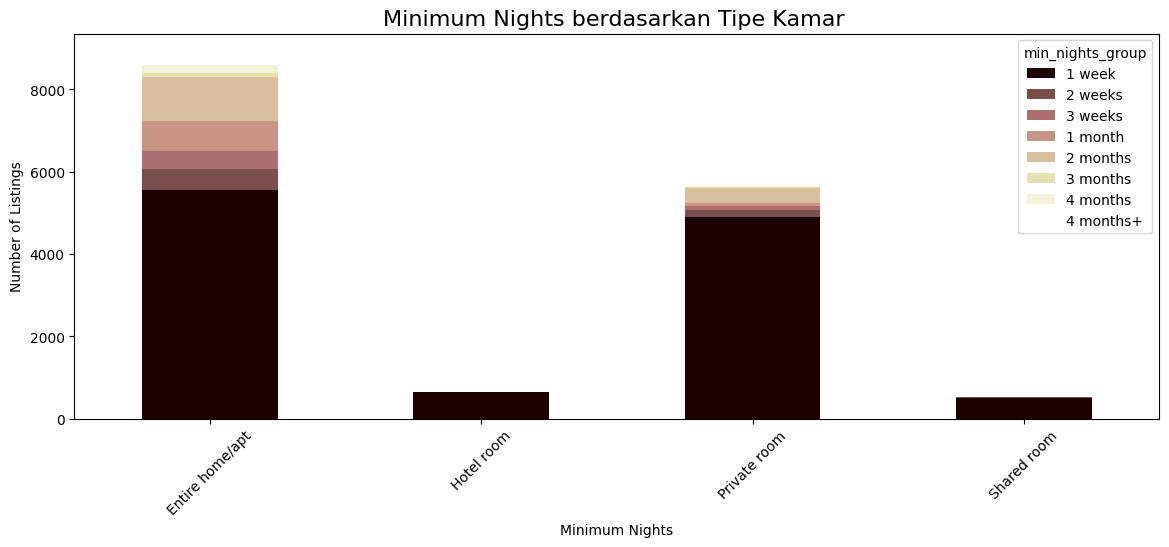

In [90]:
bins = [1, 7, 14, 21, 30, 60, 90, 120, df1['minimum_nights'].max()]
labels = [
    "1 week", "2 weeks", "3 weeks", "1 month",
    "2 months", "3 months", "4 months", "4 months+"
]

df1["min_nights_group"] = pd.cut(df1["minimum_nights"], bins=bins, labels=labels, right=False)

night_room_type = df1.groupby(["room_type","min_nights_group"]).size().unstack(fill_value=0)
night_room_type

night_room_type.plot(kind="bar", stacked=True, figsize=(14, 5), colormap="pink")
plt.title("Minimum Nights berdasarkan Tipe Kamar ", fontsize=16)
plt.xlabel("Minimum Nights")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

Grafik ini menunjukkan persyaratan minimum malam inap tiap tipe kamar agar dapat mengetahui tipe kamar pilihan short-term guest dan long-term guest.

Berdasarkan grafik diatas, kita dapat menjawab pertanyaan:

- Apa tipe kamar yang diminati oleh wisatawan? 

Tipe kamar yang diminati oleh wisatawan adalah entire home/apt yang mana ini disukai untuk wisatawan yang berpergian secara grup. Sedangkan untuk solo-traveler dapat memilih antara hotel room, private room, atau shared room sesuai dengan preferensi harga dan lama masa inap

#### Berdasarkan Keyword Fasilitas dan Transportasi Umum

Transportasi umum di Bangkok pada analisis ini melihat pada list transportasi di web: https://www.transitbangkok.com/#google_vignette

Fasilitas Airbnb Bangkok pada analisis ini melihat pada list fasilitas di web: https://www.airbnb.co.id/bangkok-thailand/stays

In [45]:
import re

In [46]:
df1["description"] = df1["name"].fillna("") + " " + df1["neighbourhood"].fillna("")

keywords = ['airport', 'BTS', 'boat', 'mrt', 'srt', 'trains', 'bus', 'buses', 'public transport','station','park', 'gym','wifi','AC','beach','kitchen','breakfast','pools','massage','spa']

for keyword in keywords:
    df1[f"has_{keyword}"] = df1["description"].apply(lambda x: bool(re.search(keyword, x, re.IGNORECASE)))

keyword_summary = pd.DataFrame(index=keywords, columns=["avg_price_with", "avg_price_without"])

<Figure size 1400x800 with 0 Axes>

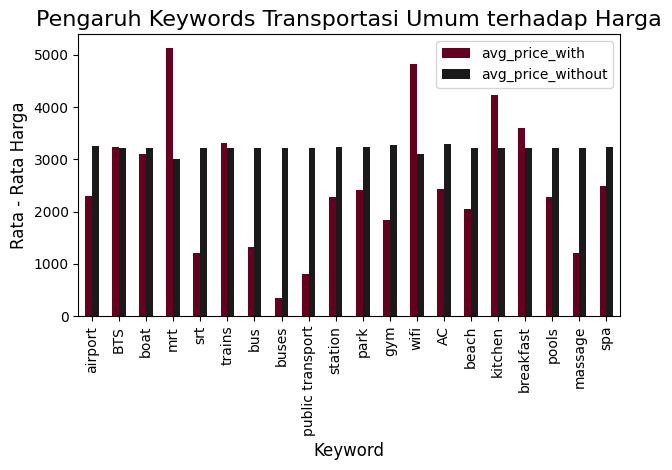

In [99]:
for keyword in keywords:
    keyword_summary.loc[keyword, "avg_price_with"] = df1.loc[df1[f"has_{keyword}"], "price"].mean()
    keyword_summary.loc[keyword, "avg_price_without"] = df1.loc[~df1[f"has_{keyword}"], "price"].mean()

keyword_summary = keyword_summary.apply(pd.to_numeric)

plt.figure(figsize=(14, 8))
keyword_summary[["avg_price_with", "avg_price_without"]].plot(kind="bar", stacked=False, colormap="RdGy")
plt.title("Pengaruh Keywords Transportasi Umum terhadap Harga", fontsize=16)
plt.xlabel("Keyword", fontsize=12)
plt.ylabel("Rata - Rata Harga", fontsize=12)
plt.tight_layout()
plt.show()

Grafik diatas menunjukkan rata - rata harga pada listings dengan keyword yang ada

<Figure size 1400x800 with 0 Axes>

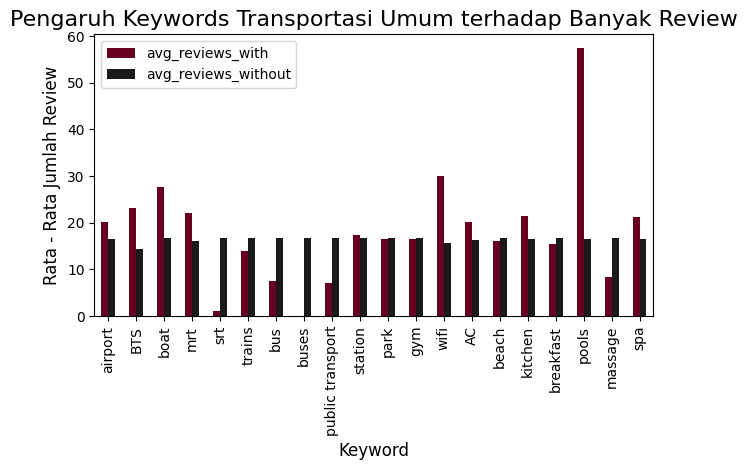

In [98]:
for keyword in keywords:
    keyword_summary.loc[keyword, "avg_reviews_with"] = df1.loc[df1[f"has_{keyword}"], "number_of_reviews"].mean()
    keyword_summary.loc[keyword, "avg_reviews_without"] = df1.loc[~df1[f"has_{keyword}"], "number_of_reviews"].mean()

keyword_summary = keyword_summary.apply(pd.to_numeric)

plt.figure(figsize=(14, 8))
keyword_summary[["avg_reviews_with", "avg_reviews_without"]].plot(kind="bar", stacked=False, colormap="RdGy")
plt.title("Pengaruh Keywords Transportasi Umum terhadap Banyak Review", fontsize=16)
plt.xlabel("Keyword", fontsize=12)
plt.ylabel("Rata - Rata Jumlah Review", fontsize=12)
plt.tight_layout()
plt.show()

Grafik diatas menggunakan number of reviews dengan asumsi menunjukkan kesan tamu selama menginap dengan keyword yang ada

<Figure size 1400x800 with 0 Axes>

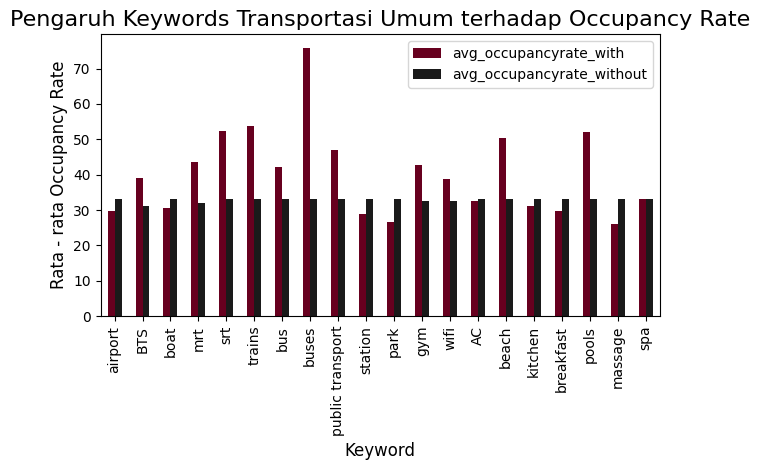

In [97]:
for keyword in keywords:
    keyword_summary.loc[keyword, "avg_occupancyrate_with"] = df1.loc[df1[f"has_{keyword}"], "occupancy_rate"].mean()
    keyword_summary.loc[keyword, "avg_occupancyrate_without"] = df1.loc[~df1[f"has_{keyword}"], "occupancy_rate"].mean()

keyword_summary = keyword_summary.apply(pd.to_numeric)

plt.figure(figsize=(14, 8))
keyword_summary[["avg_occupancyrate_with", "avg_occupancyrate_without"]].plot(kind="bar", stacked=False, colormap="RdGy")
plt.title("Pengaruh Keywords Transportasi Umum terhadap Occupancy Rate", fontsize=16)
plt.xlabel("Keyword", fontsize=12)
plt.ylabel("Rata - rata Occupancy Rate", fontsize=12)
plt.tight_layout()
plt.show()

Grafik tersebut menunjukkan rata - rata occupancy rate listings dengan keyword yang ada

In [50]:
keyword_summary.head()

,avg_price_with,avg_price_without,avg_reviews_with,avg_reviews_without,avg_occupancyrate_with,avg_occupancyrate_without
airport,2300.321033,3250.388871,20.184502,16.530272,29.804377,33.157359
BTS,3230.173400,3213.788086,23.202760,14.456690,39.041818,31.028367
boat,3106.656250,3218.131913,27.656250,16.632956,30.607877,33.047649
mrt,5134.941213,3002.855830,22.060663,16.048828,43.505102,31.869064
srt,1200.000000,3218.034191,1.000000,16.656195,52.328767,33.041507


Berdasarkan grafik diatas, kita dapat menjawab pertanyaan:

- Jenis fasilitas dan transportasi apa yang meninggalkan kesan bagi wisatawan dan bagaimana dampaknya terhadap occupancy rate?

Hampir seluruh listings yang memiliki keyword transportasi di Bangkok memiliki occupancy rate lebih tinggi, sedangkan untuk fasilitas umum yang berpengaruh pada occupancy rate adalah gym, wifi, pools. Fasilitas umum dan transportasi umum yang meninggalkan kesan dapat dilihat dari banyaknya review.

#### Berdasarkan Seasonal Trend

In [51]:
df1['last_review'] = pd.to_datetime(df1['last_review'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15853 entries, 0 to 15853
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            15853 non-null  object        
 1   host_name                       15853 non-null  object        
 2   neighbourhood                   15853 non-null  object        
 3   latitude                        15853 non-null  float64       
 4   longitude                       15853 non-null  float64       
 5   room_type                       15853 non-null  object        
 6   price                           15853 non-null  int64         
 7   minimum_nights                  15853 non-null  int64         
 8   number_of_reviews               15853 non-null  int64         
 9   last_review                     15853 non-null  datetime64[ns]
 10  reviews_per_month               15853 non-null  object        
 11  calcula

In [52]:
date_year = df1['last_review'].dt.year
date_year.value_counts()

last_review
2022    6628
1970    5789
2020    1248
2019    1012
2018     484
2017     269
2021     207
2016     149
2015      50
2014       9
2013       7
2012       1
Name: count, dtype: int64

In [53]:
date_year_m = df1['last_review'].dt.month
date_year_m.value_counts()

last_review
1     6417
12    3735
11    1711
10     722
2      537
9      530
3      520
8      474
7      394
4      310
6      267
5      236
Name: count, dtype: int64

In [54]:
date_year_filtered = df1[df1["last_review"] != pd.Timestamp("1970-01-01")]
date_year_filtered['last_review'].dt.year.value_counts()

last_review
2022    6628
2020    1248
2019    1012
2018     484
2017     269
2021     207
2016     149
2015      50
2014       9
2013       7
2012       1
Name: count, dtype: int64

In [55]:
date_year_filtered['year_month'] = date_year_filtered['last_review'].dt.to_period("M")
date_year_filtered['month'] = date_year_filtered['last_review'].dt.month
date_year_filtered['month_name'] = date_year_filtered['last_review'].dt.month_name()
date_year_filtered['year'] = date_year_filtered['last_review'].dt.year

date_year_filtered.head()

/var/folders/vw/gbfvhr_d00b3ltzk70h586xh0000gn/T/ipykernel_91911/1037561704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_year_filtered['year_month'] = date_year_filtered['last_review'].dt.to_period("M")
/var/folders/vw/gbfvhr_d00b3ltzk70h586xh0000gn/T/ipykernel_91911/1037561704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_year_filtered['month'] = date_year_filtered['last_review'].dt.month
/var/folders/vw/gbfvhr_d00b3ltzk70h586xh0000gn/T/ipykernel_91911/1037561704.py:3: SettingWithCop

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,...,has_beach,has_kitchen,has_breakfast,has_pools,has_massage,has_spa,year_month,month,month_name,year
0,Nice room with superb city view,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,...,False,False,False,False,False,False,2020-01,1,January,2020
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,...,False,False,False,False,False,True,2022-04,4,April,2022
5,NEw Pro!! Bungalow Bkk Centre,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,...,False,False,False,False,False,False,2017-08,8,August,2017
6,Condo with Chaopraya River View,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,...,False,False,False,False,False,False,2014-02,2,February,2014
8,"Batcave, Pool view, near Chatuchak",Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,...,False,False,False,False,False,False,2016-03,3,March,2016


In [56]:
date_year_filtered['month_abbr'] = date_year_filtered['last_review'].dt.strftime('%b')

/var/folders/vw/gbfvhr_d00b3ltzk70h586xh0000gn/T/ipykernel_91911/1481629631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_year_filtered['month_abbr'] = date_year_filtered['last_review'].dt.strftime('%b')


In [57]:
num_rev = date_year_filtered.groupby(['month_abbr', 'month'], as_index=False)['month_name'].count().sort_values('month')
num_rev

# month diambil dari last_review
# menghitung banyak review terakhir yang digrup berdasarkan bulan

,month_abbr,month,month_name
4,Jan,1,628
3,Feb,2,537
7,Mar,3,520
0,Apr,4,310
8,May,5,236
6,Jun,6,267
5,Jul,7,394
1,Aug,8,474
11,Sep,9,530
10,Oct,10,722


In [58]:
df_monthly_occ = date_year_filtered.groupby(['month_abbr','month'], as_index=False)['occupancy_rate'].mean().sort_values('month')
df_monthly_occ.head() 
# tidak digunakan karena tidak mengetahui waktu booking secara spesifik

,month_abbr,month,occupancy_rate
4,Jan,1,37.956112
3,Feb,2,40.137752
7,Mar,3,41.119073
0,Apr,4,37.170128
8,May,5,38.714883


In [59]:
df_monthly_p = date_year_filtered.groupby(['month_abbr','month'], as_index=False)['price'].mean().sort_values('month')
df_monthly_p.head()

,month_abbr,month,price
4,Jan,1,3616.861465
3,Feb,2,8030.985102
7,Mar,3,7104.373077
0,Apr,4,3256.348387
8,May,5,1843.720339


Text(0, 0.5, 'Banyak tamu datang')

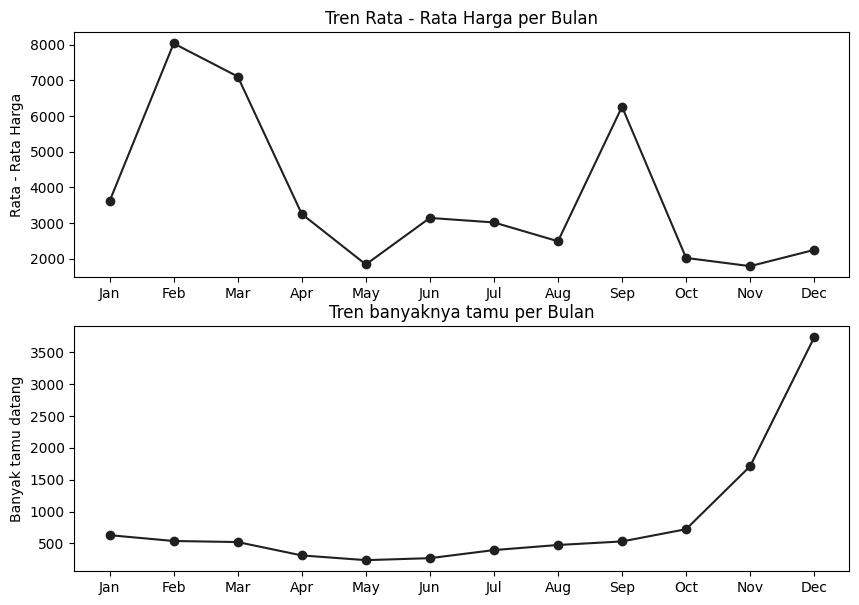

In [81]:
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(2, 1)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])

# plot 1: price
ax1.plot(df_monthly_p['month_abbr'],df_monthly_p['price'], color='#211F1F', marker='o')
ax1.set_title('Tren Rata - Rata Harga per Bulan')
ax1.set_ylabel("Rata - Rata Harga")

# plot 2: banyaknya review terakhir berdasarkan bulan
ax2.plot(num_rev['month_abbr'],num_rev['month_name'], color='#211F1F', marker='o')
ax2.set_title('Tren banyaknya tamu per Bulan')
ax2.set_ylabel("Banyak tamu datang")

Grafik diatas menunjukkan banyak tamu datang di bulan tertentu, diambil dari variabel 'month_name' yang merupakan nama bulan dari variabel 'last_review'. Menjumlahkan banyaknya 'month_name' dapat diartikan sebagai banyaknya review terakhir berdasarkan bulan sehingga dapat diasumsikan kapan waktu banyaknya wisatawan berkunjung ke listings tersebut dengan harga yang ada. 

 Berdasarkan grafik diatas, kita dapat menjawab pertanyaan:
 
 - Kapan banyaknya wisatawan berkunjung ke Bangkok (high season dan low season)?
 
 High season meningkat pada bulan November dan berada di puncak pada bulan Desember. Selain itu, merupakan middle atau low season

#### Berdasarkan Minimum Nights Required

In [87]:
bins = [1, 7, 14, 21, 30, 60, 90, 120, df1['minimum_nights'].max()]
labels = [
    "1 week", "2 weeks", "3 weeks", "1 month",
    "2 months", "3 months", "4 months", "4 months+"
]

df1["min_nights_group"] = pd.cut(df1["minimum_nights"], bins=bins, labels=labels, right=False)

min_nights_analysis = df1.groupby("min_nights_group").agg(
    avg_price=("price", "mean"),
    total_reviews=("number_of_reviews", "sum"),
    avg_occ=("occupancy_rate", "mean")
).reset_index()

/var/folders/vw/gbfvhr_d00b3ltzk70h586xh0000gn/T/ipykernel_91911/1894044598.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  min_nights_analysis = df1.groupby("min_nights_group").agg(


In [88]:
min_nights_analysis

,min_nights_group,avg_price,total_reviews,avg_occ
0,1 week,3091.005085,209380,32.096281
1,2 weeks,2974.187500,7720,37.066741
2,3 weeks,3726.761996,9108,36.225909
3,1 month,3126.814994,14029,40.501897
4,2 months,2762.825874,16752,38.719034
5,3 months,1637.083969,1264,30.900345
6,4 months,10344.881057,2547,29.651801
7,4 months+,4843.056471,2940,17.165512


Text(0.5, 1.0, 'Rata - Rata Occupancy Rate per Minimum Nights Group')

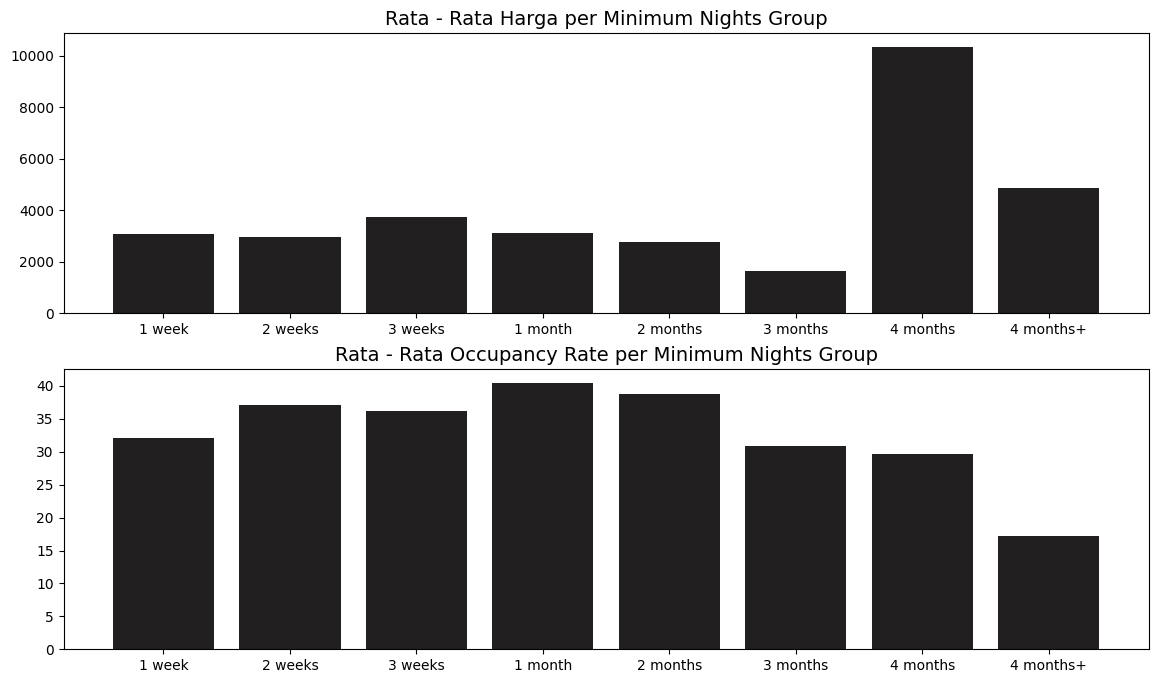

In [89]:
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(2, 1)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])

# plot 1: price
ax1.bar(min_nights_analysis['min_nights_group'], min_nights_analysis['avg_price'], color='#211F1F')
ax1.set_title("Rata - Rata Harga per Minimum Nights Group", fontsize=14)

# plot 1: occupancy rate
ax2.bar(min_nights_analysis['min_nights_group'], min_nights_analysis['avg_occ'], color='#211F1F')
ax2.set_title("Rata - Rata Occupancy Rate per Minimum Nights Group", fontsize=14)

Grafik diatas menunjukkan rata - rata harga dan rata - rata occupacy rate di tiap listings dengan syarat minimum malam inap yang berbeda - beda. 

Berdasarkan grafik diatas, kita dapat menjawab pertanyaan:
- Bagaimana preferensi wisatawan Bangkok (short-term stay atau long-term stay)?

Wisatawan Bangkok kebanyakan memiliki preferensi inap yang lama yaitu 1-2 bulan. Untuk wisatawan short-term stay biasa berada pada waktu 2 minggu.



#### Berdasarkan Bahasa yang ditampilkan

In [64]:
def remove_symbols(text):
    emoji_pattern = re.compile(pattern="["
                                     u"\U0001F600-\U0001F64F"
                                     u"\U0001F300-\U0001F5FF"
                                     u"\U0001F680-\U0001F6FF"
                                     u"\U0001F700-\U0001F77F"
                                     u"\u2600-\u26FF"
                                     u"\u2700-\u27BF"
                                     u"\u25A0-\u25FF"
                                     u"\u1D10-\u1D1F"
                                     u"\u2460-\u24FF"
                                     "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r"", text)

In [65]:
df1["name_without_emoji"] = df1["name"].apply(remove_symbols)

In [66]:
import string

In [67]:
def is_romaji(text):
    allowed = string.punctuation
    pattern = r"^[A-Za-z0-9\s" + re.escape(allowed) + "]+$"
    return bool(re.fullmatch(pattern, text))

df1["detected_language"] = df1["name_without_emoji"].apply(is_romaji)
df1.head()

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,...,has_wifi,has_AC,has_beach,has_kitchen,has_breakfast,has_pools,has_massage,has_spa,name_without_emoji,detected_language
0,Nice room with superb city view,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,...,False,False,False,False,False,False,False,False,Nice room with superb city view,True
1,"Easy going landlord,easy place",Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,1970-01-01,...,False,True,False,False,False,False,False,False,"Easy going landlord,easy place",True
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,1970-01-01,...,False,False,False,False,False,False,False,False,modern-style apartment in Bangkok,True
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,...,False,True,False,False,False,False,False,True,Spacious one bedroom at The Kris Condo Bldg. 3,True
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,1970-01-01,...,False,False,False,False,False,False,False,False,Suite Room 3 at MetroPoint,True


In [68]:
df1['detected_language'].value_counts()

detected_language
True     13443
False     2410
Name: count, dtype: int64

In [69]:
df1['d_l'] = df1["detected_language"].apply(lambda x: 'English' if x == True else 'Non-English')

In [70]:
df1['d_l'].value_counts()

d_l
English        13443
Non-English     2410
Name: count, dtype: int64

In [71]:
num_lang = df1.groupby(['d_l'], as_index=False)['price'].mean().sort_values('price')
num_lang

,d_l,price
0,English,3165.331102
1,Non-English,3511.175104


In [72]:
num_occ = df1.groupby(['d_l'], as_index=False)['occupancy_rate'].mean().sort_values('occupancy_rate')
num_occ

,d_l,occupancy_rate
0,English,32.520362
1,Non-English,35.956460


In [73]:
num_rev_lang = df1.groupby(['d_l'], as_index=False)['number_of_reviews'].mean().sort_values('number_of_reviews')
num_rev_lang

,d_l,number_of_reviews
1,Non-English,13.278423
0,English,17.260582


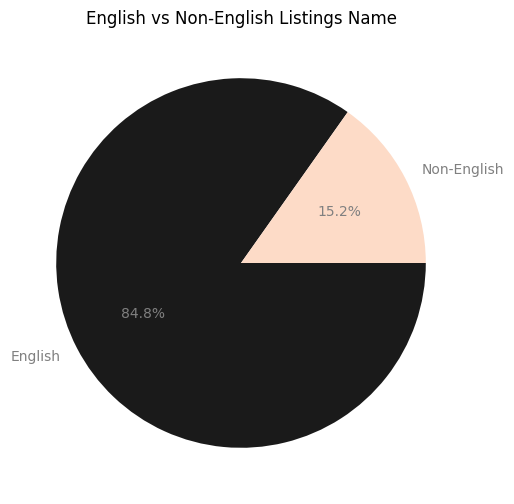

In [103]:
counts = df1['d_l'].value_counts()

colors = matplotlib.colormaps["RdGy"](np.linspace(1, 0.4, len(counts)))

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, counterclock=False, textprops={'fontsize':10, 'color':'Gray'})
plt.title("English vs Non-English Listings Name")
plt.show()

Grafik ini menunjukkan proporsi nama listings yang menggunakan bahasa inggris dan bukan bahasa inggris

In [75]:
df1[df1['d_l']=="Non-English"]

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,...,has_AC,has_beach,has_kitchen,has_breakfast,has_pools,has_massage,has_spa,name_without_emoji,detected_language,d_l
31,กรองทองแมนชั่น (ลาดพร้าว 81),Penjit,Wang Thong Lang,13.789380,100.613400,Private room,600,1,0,1970-01-01,...,False,False,False,False,False,False,False,กรองทองแมนชั่น (ลาดพร้าว 81),False,Non-English
88,เฮ้าส์โหมด House Mode,Prapussorn,Thon buri,13.726463,100.491293,Private room,800,1,0,1970-01-01,...,False,False,False,False,False,False,False,เฮ้าส์โหมด House Mode,False,Non-English
133,Studio ๏ Affordable comfort,Sarasinee,Phaya Thai,13.788870,100.560090,Entire home/apt,500,30,4,2012-12-15,...,False,False,False,False,False,False,False,Studio ๏ Affordable comfort,False,Non-English
165,Chambre privée en condominium,Arnaud,Khlong Toei,13.736840,100.554880,Private room,1500,7,0,1970-01-01,...,False,False,False,False,False,False,False,Chambre privée en condominium,False,Non-English
186,วรภาดา น้อยพันธ์,Catroom,Bang Rak,13.731800,100.523510,Private room,980,1,0,1970-01-01,...,False,False,False,False,False,False,False,วรภาดา น้อยพันธ์,False,Non-English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15814,高空花园健身房泳池桑拿豪华公寓＋市中双轨BTSMRT＋Asok NanaSoicowboy,Ed,Vadhana,13.743040,100.558462,Entire home/apt,1950,1,0,1970-01-01,...,False,False,False,False,False,False,False,高空花园健身房泳池桑拿豪华公寓＋市中双轨BTSMRT＋Asok NanaSoicowboy,False,Non-English
15818,曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费,MeetU,Sathon,13.710777,100.519891,Entire home/apt,1532,1,0,1970-01-01,...,False,False,False,False,False,False,False,曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费,False,Non-English
15819,Bkk/BTS Surasak/温馨loft公寓5/免费泳池/健身房/WIFI/免费停车,Hoha,Sathon,13.709604,100.520707,Entire home/apt,1532,1,0,1970-01-01,...,False,False,False,False,False,False,False,Bkk/BTS Surasak/温馨loft公寓5/免费泳池/健身房/WIFI/免费停车,False,Non-English
15835,*Best Pool View*5 Min​ Walk to MRT*Wifi*Washma...,Durian,Huai Khwang,13.790493,100.575049,Entire home/apt,1442,2,0,1970-01-01,...,True,False,False,False,False,False,False,*Best Pool View*5 Min​ Walk to MRT*Wifi*Washma...,False,Non-English


Text(0.5, 1.0, 'Rata - Rata Review berdasarkan Bahasa yang ditampilkan')

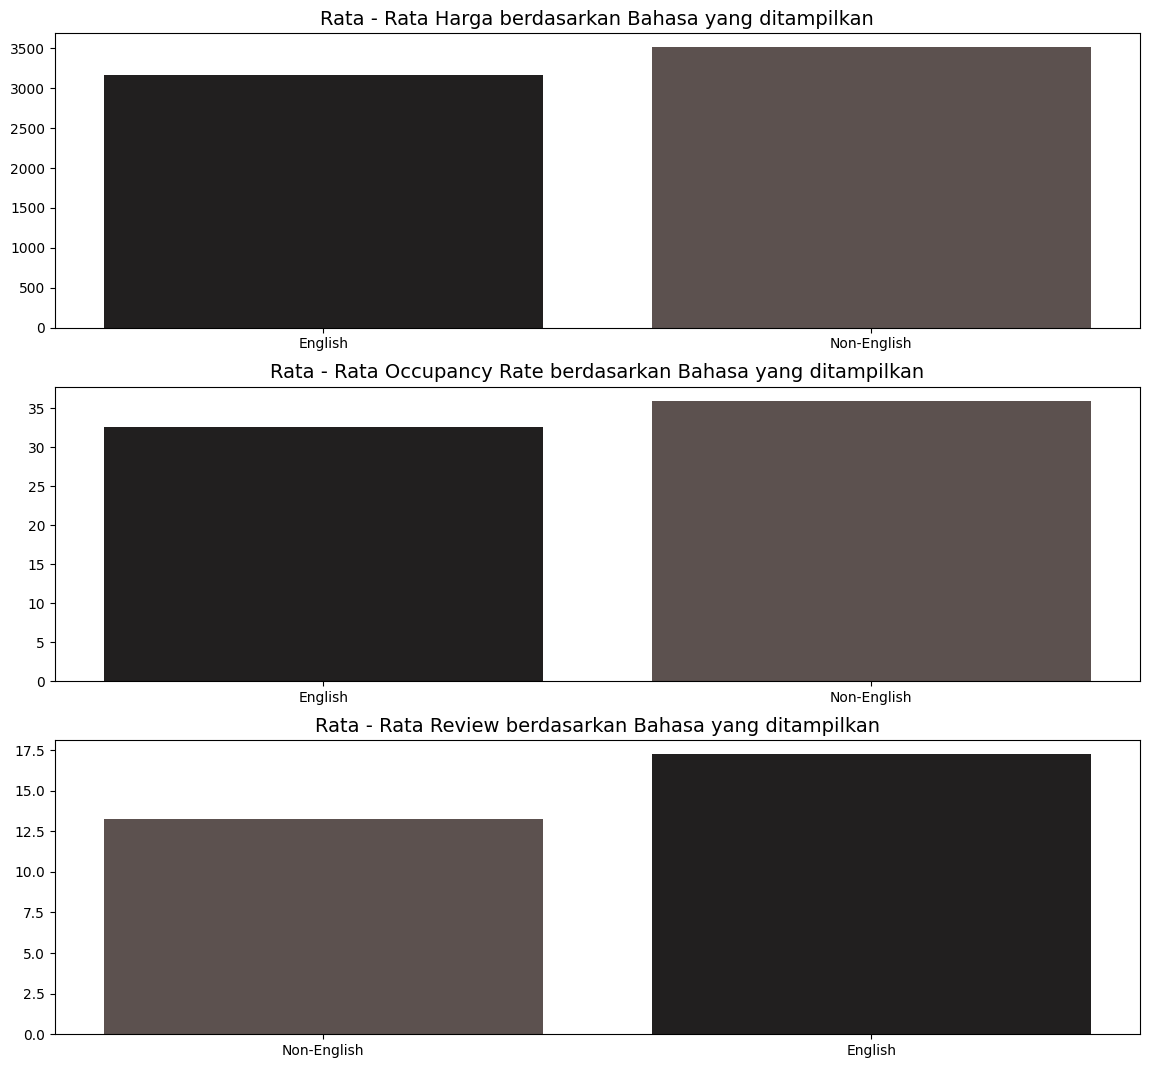

In [86]:
fig = plt.figure(figsize=(14, 13))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2, :])

language_colors = {
    "English": "#211F1F",     
    "Non-English":      "#5C514F"
}

# plot 1: price
ax1.bar(num_lang['d_l'], num_lang['price'], color=[language_colors[l] for l in num_lang['d_l']])
ax1.set_title("Rata - Rata Harga berdasarkan Bahasa yang ditampilkan", fontsize=14)

# plot 2: occupancy
ax2.bar(num_occ['d_l'], num_occ['occupancy_rate'], color=[language_colors[l] for l in num_occ['d_l']])
ax2.set_title("Rata - Rata Occupancy Rate berdasarkan Bahasa yang ditampilkan", fontsize=14)

# plot 3: number pf review
ax3.bar(num_rev_lang['d_l'], num_rev_lang['number_of_reviews'], color=[language_colors[l] for l in num_rev_lang['d_l']])
ax3.set_title("Rata - Rata Review berdasarkan Bahasa yang ditampilkan", fontsize=14)


Grafik ini menunjukkan rata - rata harga, rata - rata occupancy rate, dan rata - rata jumlah review berdasarkan bahasa yang ditampilkan

Berdasarkan grafik diatas, kita dapat menjawab pertanyaan:
- Bagaimana dampak bahasa yang ditampilkan di listings terhadap occupancy rate dan kesan wisatawan?

Kebanyakan listing menampilkan nama dalam bahasa Inggris yang banyak meninggalkan kesan bagi tamu, tetapi tidak merupakan faktor yang terlalu berpengaruh pada harga dan occupancy rate.

note: Non-English tidak serta merta tidak menggunakan Bahasa Inggris, sebagian menyisipkan 2 bahasa di dalamnya.

In [77]:
df1.to_csv("Airbnb Bangkok Final.csv", index=False)

In [78]:
import openpyxl

In [79]:
df1.to_excel("Airbnb Bangkok Final.xlsx", index=False)

## Kesimpulan dan Rekomendasi

**Area** 

Kesimpulan:
1. Area dengan kepadatan wisatawan yang lebih tinggi (higher occupancy rate) memiliki tantangan dalam mempertahankan performa listings dengan menawarkan harga yang baik (tidak overprice atau underprice). Listings harus memiliki fitur menarik seperti pengalaman yang unik maupun fasilitas yang ditingkatkan untuk menarik wisatawan.

2. Area dengan occupancy rate yang lebih rendah memiliki kesempatan lebih untuk meningkatkan performa melalui penawaran harga yang terjangkau dengan lingkungan yang dapat menjadi daya tarik dalam berwisata. Area ini dapat menjangkau segmen low-budget traveler di Bangkok.

Rekomendasi:

Host dapat mengkaji ulang harga, baik melihat rata - rata harga area sendiri maupun rata - rata harga area lain (termasuk seberapa dekat dengan area wisata) agar dapat menawarkan harga yang kompetitif

**Tipe Kamar**

Kesimpulan:

Bagi group traveler:

1. Tipe kamar yang paling diminati oleh wisatawan adalah entire home/apt. Kemungkinan besar wisatawan yang pergi ke Bangkok adalah grup sehingga entire home/apt menjadi pilihan akomodasi yang pas. Selain itu, entire home/apt juga memiliki beberapa variasi penginapan dalam persyaratan minimum nights sehingga group-traveler dengan short-term maupun long-term terakomodasi dengan baik. Oleh karena itu, jika entire home/apt dapat tetap pada standar rata - rata harga yang ada, akan terus menjadi akomodasi unggulan bagi wisatawan bangkok.

Bagi solo-traveler:

2. Pilihan akomodasi bagi solo traveler adalah hotel room, private room, dan shared room (berdasarkan persyaratan maksimal person pada umumnya). Dalam hal ini, hotel room memiliki rata - rata harga yang lebih rendah dengan fleksibilitas persyaratan minimum nights (1-3 hari) dibandingkan dengan private room sehingga mencapai occupancy rate yang lebih tinggi.

3. Shared room merupakan akomodasi yang linear antara rata - rata harga yang jauh lebih rendah dengan occupancy rate yang rendah pula. Hal ini disebabkan oleh segmentasi wisatawan solo traveler, khususnya backpacker yang mau bersosialisasi dengan wisatawan lainnya. Akomodasi ini memiliki keunggulan dan pasar tertentu dibandingkan jenis akomodasi lainnya.

Rekomendasi:

Berdasarkan analisis tipe kamar ini, maka harga dan fleksibilitas dalam memilih minimum malam inap merupakan hal yang harus diperhatikan untuk meningkatkan occupancy rate di keempat tipe kamar.

**Keyword**

Kesimpulan:

1. Berdasarkan grafik, rata - rata harga listings akan meningkat jika ada keyword MRT, wifi, kitchen, dan breakfast

2. Kesan dalam pengalaman tamu yang menginap paling tinggi ditunjukkan jika listings memiliki kata kunci pools atau kolam renang. Lalu kata kunci yang linear terhadap rata - rata harga yang lebih tinggi adalah MRT, wifi, dan kitchen. Lalu, untuk kesan lainnya diberikan pada penginapan dengan keyword airport, BTS, boat, station, AC, dan spa.

3. Occupancy rate yang lebih tinggi ditujukan pada penginapan yang memiliki key word MRT dan wifi meskipun dengan rata - rata yang lebih tinggi pula. Selain itu, BTS, SRT, trains, bus, buses, dan public transport juga memiliki occupancy rate yang lebih tinggi dibandingkan listings yang tidak menampilkan keyword tersebut. Keyword fasilitas seperti gym, beach, dan pools juga berperan penting dalam meningkatkan occupancy rate.

Jadi,
- Keyword MRT dan wifi adalah hal yang paling signifikan dalam meningkatkan occupancy rate meskipun dengan rata - rata harga yang lebih tinggi
- Wisatawan memerhatikan kenyamanan dalam bertransportasi di Bangkok seiring meningkatkanya occupancy rate pada penginapan yang memiliki keyword transportasi umum
- Keyword pools atau kolam renang mendapatkan banyak kesan bagi wisatawan yang juga terbukti pada tingkat occupancy rate lebih tinggi dibandingkan yang tidak memiliki keyword tersebut

Rekomendasi:

Listings dapat menambahkan keyword fasilitas yang ada dan transportasi umum yang relevan guna meningkatkan occupancy rate

**Seasonal trend**

Kesimpulan:

1. Banyaknya tamu meningkat dimulai di bulan November dan mengalami peak season di bulan Desember. Hal ini disebabkan oleh libur akhir tahun sehingga wisatawan banyak datang berkunjung. Sedangkan, low season terjadi di Bulan Januari - September.
2. Rata - rata harga listings terlihat fluktuatif di setiap bulannya dengan harga paling tinggi berada pada bulan Februari, diikuti oleh bulan September.

Rekomendasi:

- Pada bulan peak season, occupancy rate memiliki kemungkinan lebih besar untuk meningkat seiring jumlah wisatawan yang tinggi. Listings dapat meningkatkan harga yang lebih tinggi dan kompetitif karena demand meningkat. 
- Pada bulan low season, dengan sedikitnya wisatawan yang berkunjung, maka daya tarik listings akan dilihat dengan penawaran harga dan promosi yang menarik, seperti diskon harga, diskon lebih ketika menginap lebih lama, free-breakfast, dan service lainnya. 
- Host harus mengevaluasi dan menyesuaikan dengan kondisi season yang berubah - ubah untuk meningkatkan occupancy rate

**Minimum Nights Required**

Kesimpulan:

1. Berdasarkan banyaknya minimum nights yang disyaratkan oleh host, occupancy rate tertinggi berada pada 1-2 bulan untuk short-term stay dan 2 weeks untuk long-term stay
2. Short-term stay traveler memilih 2 weeks karena memiliki harga lebih rendah dibandingkan listings dengan persyaratan minimum 1 week atau 3 weeks
3. Grafik juga menunjukkan long-term stay traveler lebih memilih untuk book listings dengan minimum persyaratan 1-2 bulan dibandingkan dengan listings dengan minimum 3-4 bulan atau 4 bulan lebih karena harga yang lebih rendah. Walaupun 3 bulan memiliki harga lebih rendah dibandingkan listing long-term stay lainnya, occupancy rate tidak lebih tinggi. Oleh karena itu, informasi yang dapat disimpulkan adalah pada saat ini traveler dominan untuk tinggal di listings yang sama 1-2 bulan. 

Rekomendasi:

- Host perlu mengevaluasi harga penginapan untuk short-term stay listing agar lebih kompetitif dan bisa meningkatkan occupancy rate
- Host perlu mengevaluasi minimum nights required untuk long-term stay listing agar wisatawan lebih fleksibel dan bisa meningkatkan occupancy rate

**Bahasa yang digunakan**

Kesimpulan:

1. Nama listings yang menggunakan bahasa Inggris lebih banyak dibandingkan dengan bahasa non-inggris. Rata - rata jumlah review nama listings yang menggunakan bahasa Inggris juga lebih banyak
2. Rata - rata harga dan rata - rata occupancy rate nama listings yang tidak menggunakan bahasa inggris lebih tinggi sehingga nama listings yang menggunakan bahasa Inggris tidak selalu lebih ramai dibandingkan nama listings yang digunakan dengan bahasa non-Inggris. 

Rekomendasi:

- Host dapat memberikan keterangan yang lengkap baik bahasa inggris maupun bahasa lokal untuk menjangkau pasar internasional dan domestik yang lebih luas
- Meskipun nama listings tidak sepenuhnya menggunakan bahasa Inggris, dapat dilihat bahwa banyak listings tetap mengkombinasikannya dengan bahasa Ingrris sehingga masih dapat dimengerti banyak orang. banyak listings keterangan dan dokumen pendukung seperti foto listings juga menjadi daya tarik tersendiri bagi wisatawan untuk memutuskan menginap